## MSIS 2802 Data Science Analysis with Python
## Team - Sneha Krishnan, Neha Pawar
## Data - Student Performance Data

### About the Data:
Student's academic performance depends on a lot of factors like Social, Demographic, Student's behavior, School and facilities provided by the school etc. 

We wanted to analyze this dataset to understand which factors influence a student's academic performance the most. The idea behind this is that if students, parents/ guardians and school management had these insights, they could change the efforts and approach for helping students perform well academically and thus contribute more effectively in building a better future for the students.

Our dataset is taken from UCI Machine Learning Repository. The dataset was collected from students of two Portuguese schools (Gabriel Pereira and Mousinho da Silveira) by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

The link to the dataset is below:
https://archive.ics.uci.edu/ml/datasets/Student+Performance

We combined the two datasets (Math and Portuguese datasets). There were some challenges in joining the datasets as the students who had only math grades did not have portuguese grades and vice versa and there were students who had both grades. We took several efforts to bring these different datasets together. We have explained the process below in Data Preparation.

## Dataset Description

### Both our datasets on math and portuguese scores have the following columns

<ol>
<li>school -> Student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)</li> 
<li>sex -> Student's gender ("F" - female or "M" - male)</li>
<li>age -> Student's age (From 15 to 22)</li>
<li>address -> Student's home address type ("U" - urban or "R" - rural)</li>
<li>famsize -> family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)</li>
<li>Pstatus -> parent's cohabitation status ("T" - living together or "A" - apart)</li>
<li>Medu -> mother's education (0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 
            3 – secondary education or 4 – higher education</li>
<li>Fedu -> father's education (0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 
3 – secondary education or 4 – higher education)</li>
<li>Mjob -> mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), 
"at_home" or "other")</li>
<li>Fjob -> father's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), 
"at_home" or "other")</li>
<li>reason -> reason to choose this school (close to "home", school "reputation", "course" preference or "other")</li>
<li>guardian -> student's guardian ("mother", "father" or "other")</li>
<li>traveltime -> home to school travel time (1 - less than 15 min, 2 - 15 to 30 min., 3 - 30 min. to 1 hour, 
or 4 - >1 hour)</li>
<li>studytime -> weekly study time (1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li>failures -> number of past class failures (n if n is between 1 to 3, else 4)</li>
<li>schoolsup -> extra educational support (yes or no)</li>
<li>famsup -> family educational support (yes or no)</li>
<li>paid -> extra paid classes within the course subject (Math or Portuguese) (yes or no)</li>
<li>activities -> extra-curricular activities (yes or no)</li>
<li>nursery -> attended nursery school (yes or no)</li>
<li>traveltime -> home to school travel time (numeric: 1 - less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour,
or 4 - >1 hour)</li>
<li>higher -> wants to take higher education (yes or no)</li>
<li>internet -> Internet access at home (yes or no)</li>
<li>romantic -> In a romantic relationship (yes or no)</li>
<li>famrel -> quality of family relationships (from 1 - very bad to 5 - excellent)</li>
<li>freetime -> free time after school (from 1 - very low to 5 - very high)</li>
<li>goout-> going out with friends (from 1 - very low to 5 - very high)</li>
<li>Dalc -> workday alcohol consumption (from 1 - very low to 5 - very high)</li>
<li>Walc -> weekend alcohol consumption (from 1 - very low to 5 - very high)</li>
<li>health -> current health status (from 1 - very bad to 5 - very good)</li>
<li>absences -> number of school absences (from 0 to 93)</li>
<li>G1 -> first period grade (from 0 to 20)</li>
<li>G2 -> second period grade (from 0 to 20)</li>
<li>G3 -> final grade (from 0 to 20)</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from IPython.display import Image
import pydotplus

Populating the interactive namespace from numpy and matplotlib


### Importing datasets for Math and Portuguese scores

In [2]:
stud_math = pd.read_csv('student-mat.csv',sep=';', error_bad_lines=False, encoding='utf8')
stud_por = pd.read_csv('student-por.csv',sep=';', error_bad_lines=False, encoding='utf8')

### Merging both math and portuguese datasets to get those rows for which we have both math and portuguese scores i.e. students who have math scores as well as portuguese scores

In [3]:
stud_math_and_por = stud_math.merge(stud_por, how = 'inner',
                                   on = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob",
                                                               "Fjob","reason","nursery","internet","guardian","guardian","traveltime"
                                                               ,"studytime","failures","schoolsup","famsup","activities","higher","romantic",
                                                               "famrel","freetime","goout","Dalc","Walc","health","absences"])

### Retrieving students who have only math scores from stud_math dataset, as it contains students who belong to stud_por dataset as well

In [4]:
stud_math_only = stud_math[~stud_math.isin(stud_math_and_por)].dropna()

### Retrieving students who have only por scores from stud_por dataset, as it contains students who belong to stud_math dataset as well

In [5]:
stud_por_only = stud_por[~stud_por.isin(stud_math_and_por)].dropna()

### Correlation between G1, G2 and G3 for each of stud_math and stud_por datasets

In [6]:
print ('Correlation between G1 and G3 scores for Math dataset is ' +str(stud_math['G1'].corr(stud_math['G3'])))
print ('Correlation between G2 and G3 scores for Math dataset is ' +str(stud_math['G2'].corr(stud_math['G3'])))
print ('Correlation between G1 and G3 scores for Portuguese dataset is ' +str(stud_por['G1'].corr(stud_por['G3'])))
print ('Correlation between G2 and G3 scores for Portuguese dataset is ' +str(stud_por['G2'].corr(stud_por['G3'])))

Correlation between G1 and G3 scores for Math dataset is 0.801467932017
Correlation between G2 and G3 scores for Math dataset is 0.904867989269
Correlation between G1 and G3 scores for Portuguese dataset is 0.826387124789
Correlation between G2 and G3 scores for Portuguese dataset is 0.91854800356


### We observe that G1 and G2 both have a very strong correlation with G3 of Math and Portuguese datasets, we will not consider G1 and G2 for our analysis of student grade performance. We will use only the G3 grades

### Computing average grade for both math and portuguese G3 scores for students with both scores i.e. stud_math_and_por dataset

In [7]:
stud_math_and_por['AverageFinalGrade'] = (stud_math_and_por['G3_x'] + stud_math_and_por['G3_y']) /2

### We will create a column Grade_Class to classify students as high performing students and low performing students. Students who score more than the mean score will be categorized as high performing students and those who score mean or below that will be categorized as low performing students

### Creating Grade_Class for stud_math_only and stud_por_only dataset based on their resepective G3 grades 

In [8]:
stud_math_only['Grade_Class'] = stud_math_only['G3'].apply(lambda x: 1 if x > stud_math_only['G3'].mean() else 0)
stud_por_only['Grade_Class'] = stud_por_only['G3'].apply(lambda x: 1 if x > stud_por_only['G3'].mean() else 0)

### Creating Grade_Class for stud_math_and_por dataset based on the AverageFinalGrade column

In [9]:
stud_math_and_por['Grade_Class'] = stud_math_and_por['AverageFinalGrade'].apply(lambda x: 1 if x > 
                                                                                stud_math_and_por['AverageFinalGrade'].mean() else 0)

### The following are the data preparation steps to create common columns for all 3 of our dataframes, stud_math_only, stud_por_only and stud_math_and_por as we will combine all 3 datasets to get one combined dataframe which will be used for our insights

### 1.Changing column names for G3 in stud_math_only and stud_por_only to Math_G3 and Por_G3 and paid in stud_math_only to paid_math and paid in stud_por_only to paid_por

In [10]:
stud_math_only.rename(columns = {'G3' : 'Math_G3', 'paid' : 'paid_math'},inplace= True)
stud_por_only.rename(columns = {'G3' : 'Por_G3', 'paid' : 'paid_por'}, inplace = True)

### 2. Changing column G3_x to Math_G3 and G3_y to Por_G3 and paid_x to paid_math and paid_y to paid_por

In [11]:
stud_math_and_por.rename(columns = {'G3_x' : 'Math_G3', 'G3_y' : 
                                    'Por_G3','paid_x' : 'paid_math', 'paid_y' : 'paid_por'},inplace= True)

### 3. Adding column Por_G3 in stud_math_only and assigning it a value of 0 and adding column Math_G3 in stud_por_only and assigning it a value of 0

In [12]:
stud_math_only['Por_G3'] = 0
stud_por_only['Math_G3'] = 0

### 3. Adding column paid_por in stud_math_only and assigning value = 0 and likewise adding column paid_math in stud_por_only and assigning value = 0

In [13]:
stud_math_only['paid_por'] = 'no'
stud_por_only['paid_math'] = 'no'

### 4. Dropping columns G1, G2 from stud_math_only and stud_por_only and columns G1_x, G2_x, G1_y, G2_y from stud_math_and_por as we saw that G1 and G2 scores have high correlation with G3 scores

In [14]:
stud_math_only.drop(['G1','G2'], axis = 1, inplace = True)
stud_por_only.drop(['G1','G2'], axis = 1, inplace = True)
stud_math_and_por.drop(['G1_x','G2_x','G1_y','G2_y'], axis = 1, inplace= True)

### 5. Dropping column AverageFinalGrade from stud_math_and_por

In [15]:
stud_math_and_por.drop('AverageFinalGrade', axis = 1, inplace= True)

### 6. Adding column 'Course' in each dataframe stud_math_only, stud_por_only and stud_math_and_por to identify which course does the row belong to

In [16]:
stud_math_only['Course'] = 'M'
stud_por_only['Course'] = 'P'
stud_math_and_por['Course'] = 'MP'

### 7. Combining the 3 dataframes stud_math_only, stud_por_only and stud_math_and_por together to get 1 dataframe which will be then used for our insights

In [17]:
combined_df = stud_math_only.merge(stud_por_only, how = 'outer').merge(stud_math_and_por, how = 'outer')

### Data Preparation in our combined_df to make it suitable for deriving insights using machine learning models

### 1. Combine Dalc and Walc which is workday alcohol consumption and weekend alcohol consumption to get Weeklyalc which would be the weekly alcohol consumption for each student

In [18]:
combined_df['Weeklyalc'] = combined_df['Dalc'] + combined_df['Walc']

### 2. Binning WeeklyAlc to categorize alcohol consumption to low and high consumption

In [19]:
combined_df['Weeklyalc_bins'] = pd.cut(combined_df['Weeklyalc'], bins = [1,5,10], labels = [1,2])

### 3. Converting all Categorical columns into numeric binary columns that can be used for machine learning insights

In [20]:
combined_df_final = pd.get_dummies(combined_df, columns = ['school','sex', 'address','famsize', 'Pstatus', 
                                         'Mjob', 'Fjob','reason', 'guardian', 'schoolsup', 'famsup',
                                        'paid_math','nursery', 'paid_por', 'Course',
                                        'activities', 'higher', 'internet', 'romantic'])

## Insight 1 : Classification for Grade_Class (low and high performing students)

In [21]:
insight1_df = combined_df_final.copy()

### Dropping columns not relevant to our analysis
<ol>
<li>Math_G3 and Por_G3 as we have our target variable Grade_Class derived from these two columns</li>
<li>Dalc, Walc and Weeklyalc as we have Weeklyalc_bins derived from these columns</li>
<li>school_GP, school_MS, reason_course, reason_home, reason_other,
reason_reputation, nursery_yes, paid_math_yes, paid_math_no, paid_por_no, paid_por_yes,
nursery_no, failures</li>
</ol>

In [22]:
insight1_df.drop(['Math_G3', 'Por_G3','Dalc','Walc','Weeklyalc',
                 'school_GP','school_MS','reason_course','reason_home',
                 'reason_other','reason_reputation','nursery_yes','paid_math_yes',
                 'paid_math_no','paid_por_no','paid_por_yes','nursery_no','failures'], axis =1, inplace= True)

In [23]:
X = insight1_df.drop('Grade_Class', axis =1)
Y = insight1_df.Grade_Class

In [74]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

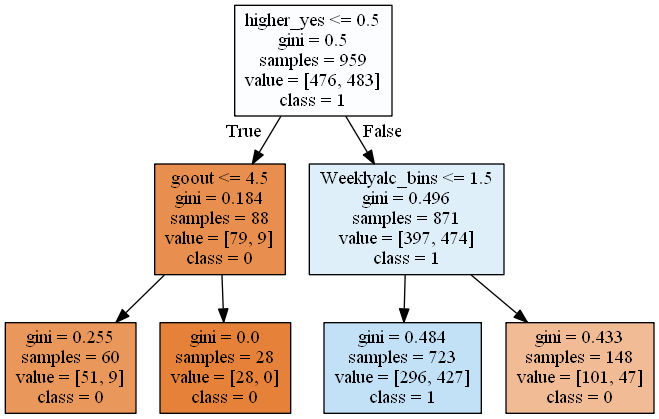

In [75]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Finding from Classification:

### Students who are motivated by desire to pursue higher studies score high grades but as their weekly alcohol consumption increases their grade performance decreases.

### Validating the finding:

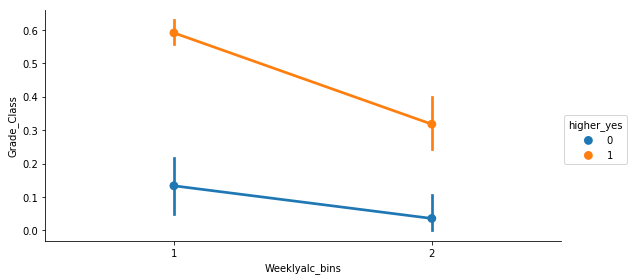

In [78]:
sns.factorplot(x = 'Weeklyalc_bins', y = 'Grade_Class', hue = 'higher_yes', data = insight1_df, aspect = 2)

In [82]:
insight1_df.groupby(['higher_yes','Weeklyalc_bins','Grade_Class']).agg({'Weeklyalc_bins' :'count'}).rename(
    columns = {'Weeklyalc_bins' : 'Number_of_Students'})

Number_of_Students
higher_yes Weeklyalc_bins Grade_Class                    
0          1              0                            52
                          1                             8
           2              0                            27
                          1                             1
1          1              0                           296
                          1                           427
           2              0                           101
                          1                            47

### Managerial Insight:

### Students and parents should be mindful of the negative influence of increased alcohol consumption even when the student's desire to pursue higher education is contributing to their high grades. Thus students and parents should make sure that students' weekly alcohol consumption does not increase to more than 5 times a week.

### Insight 2: Regression for Alchohol Consumption

### From Insight 1 it is clear that increased alcohol consumption has a negative effect on grades, so we wanted to understand what factors increase the chances of high alcohol consumption in students

In [25]:
insight2_df = combined_df_final.copy()

### Dropping the columns not relevant to our analysis
<ol>
<li>all columns related to school, grades and studies as we know that grades and studies are an effect of alcohol consumption and not a cause</li>
<li>Dalc and Walc as we have Weeklyalc which is derived from these columns</li>
</ol>

In [26]:
insight2_df.drop(['Math_G3', 'Por_G3', 'traveltime','studytime', 'failures',
                 'absences','school_GP', 'school_MS', 'reason_course',
                     'reason_home', 'reason_other', 'reason_reputation',
                     'schoolsup_yes', 'schoolsup_no', 'famsup_yes', 'famsup_no',
                     'paid_math_no', 'paid_math_yes','paid_por_yes', 'paid_por_no',
                     'nursery_yes', 'nursery_no', 'higher_yes', 'higher_no', 'Grade_Class',
                 'Dalc', 'Walc','Weeklyalc_bins'], axis = 1, inplace = True)

In [27]:
X = insight2_df.drop('Weeklyalc', axis =1)
Y = insight2_df.Weeklyalc

In [173]:
dt = tree.DecisionTreeRegressor(max_depth=3)
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

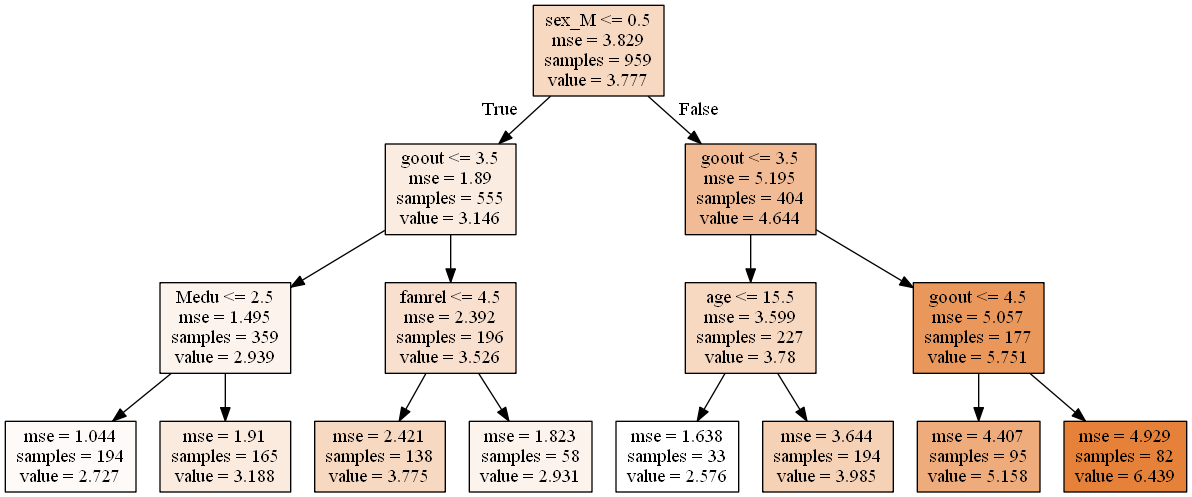

In [174]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Finding from Regression:

### Among students that go out a lot with their friends in the week, good family relationships negatively affect alcohol consumption in females but not in males

### Validating Finding:

### Grouping goout column into two groups one for those who go out with friends very often (more than 3.5 times) and the other for those who do not go out very often (less than 3.5 times)

In [28]:
insight2_df['goout_bins'] = pd.cut(insight2_df.goout, bins=[0,3.5,5],labels = [1,2])

### Grouping famrel column(family relationship) to very good (4.6 and above) and bad (less than 4.5)

In [29]:
insight2_df['famrel_bins'] = pd.cut(insight2_df.famrel, bins=[0,4.5,5],labels = [1,2])

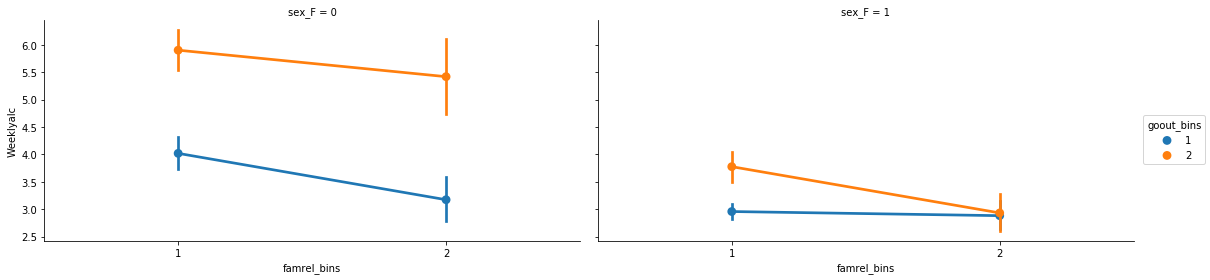

In [30]:
sns.factorplot(x = 'famrel_bins', y = 'Weeklyalc', hue= 'goout_bins', data = insight2_df,col = 'sex_F', aspect = 2)

### Note: We did observe that the confidence intervals in the graphs shown seems a little high, as a result of which we binned the famrel and goout columns to get clearer insights but due to smaller data size, we could not achieve perfect results

In [32]:
insight2_df.groupby(['sex_F', 'goout_bins', 'famrel_bins']).agg({'Weeklyalc':'mean'})

Weeklyalc
sex_F goout_bins famrel_bins           
0     1          1             4.018405
                 2             3.171875
      2          1             5.901639
                 2             5.418182
1     1          1             2.956364
                 2             2.880952
      2          1             3.775362
                 2             2.931034

### Managerial action point to Parents:

### Providing good family relationships is a very important factor in fostering good habits for students, especially for female students as it decreases their alcohol consumption significantly. So, parents and guardians should provide very good family relationships for female students so that they will consume less alcohol and get better grades

### Insight 3: Grade Classification for school Gabriel Pereira (GP)

In [33]:
insight3_df = combined_df_final.copy()

In [34]:
insight3_df['absence_bins'] = pd.cut(insight3_df.absences, bins = [-1,37.5,75], labels = [0,1])

In [35]:
insight3_df.drop(['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                                            'Math_G3', 'studytime','Por_G3', 'Weeklyalc', 'Weeklyalc_bins',
                                             'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 
                                            'Pstatus_T', 'Mjob_at_home', 'Mjob_health' , 'Mjob_other', 'Mjob_services', 
                                             'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 
                                             'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no',
                                            'famsup_yes','nursery_no', 'nursery_yes', 'Course_M', 'Course_MP', 'Course_P', 
                                              'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no'
                                             ,'romantic_yes', 'reason_home', 'reason_other', 'reason_course','reason_reputation','failures',
                 'absences'], axis =1, inplace = True)

In [36]:
X = insight3_df.drop(['Grade_Class'], axis = 1)
Y = insight3_df.Grade_Class

In [37]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

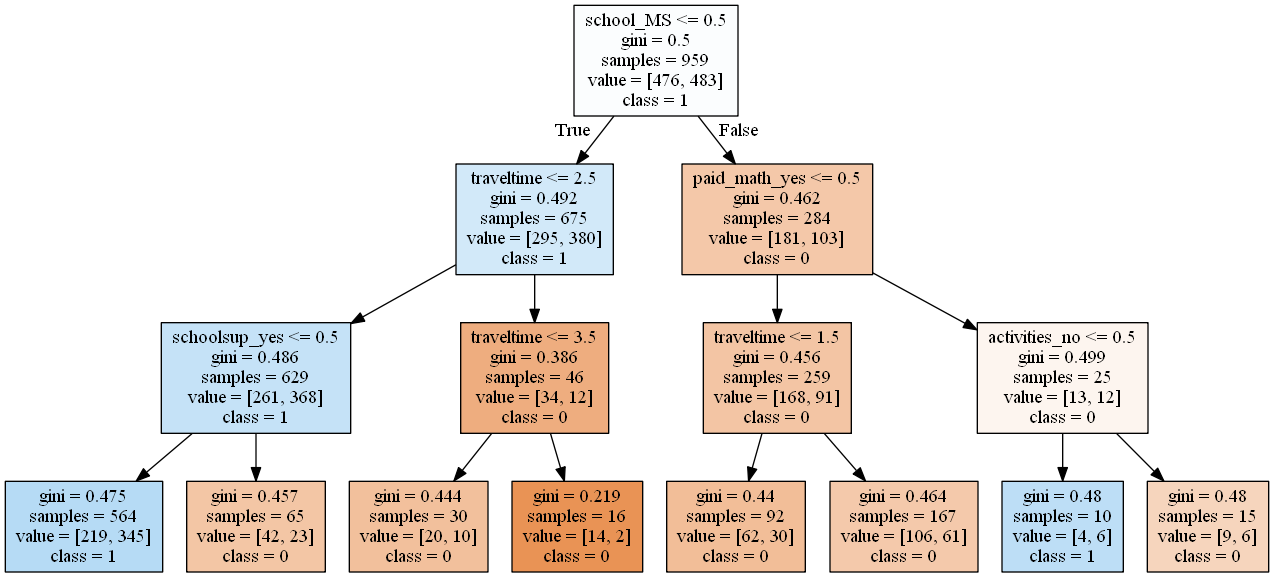

In [38]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Finding from Classification:

### Students of school Gabriel Pereira (GP) who spend very less time in traveling from home to school have high grades even in the absence of school support

### Validating the finding:

In [39]:
insight3_df.groupby(['school_GP', 'schoolsup_yes', 'traveltime', 'Grade_Class']).agg({ 'traveltime': 'count'})

traveltime
school_GP schoolsup_yes traveltime Grade_Class            
0         0             1.0        0                    63
                                   1                    31
                        2.0        0                    77
                                   1                    52
                        3.0        0                    31
                                   1                    13
                        4.0        0                     3
                                   1                     2
          1             1.0        0                     3
                                   1                     3
                        2.0        0                     3
                                   1                     1
                        3.0        1                     1
                        4.0        0                     1
1         0             1.0        0                   150
                                   1                   258
                        2.0        0                    69
                                   1                    87
                        3.0        0                    18
                                   1                    10
                        4.0        0                    12
                                   1                     2
          1             1.0        0                    30
                                   1                    18
                        2.0        0                    12
                                   1                     5
                        3.0        0                     2
                        4.0        0                     2

In [40]:
insight3_df['traveltime_bins'] = pd.cut(insight3_df.traveltime, bins = [0,2.5,5], labels = [1,2])

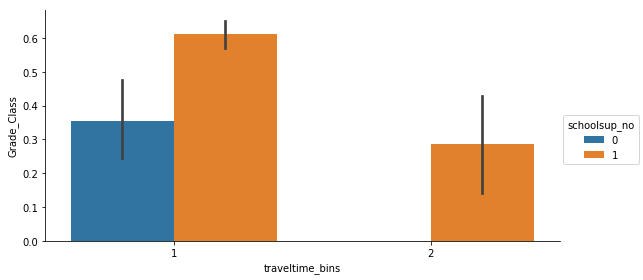

In [41]:
sns.factorplot(x = 'traveltime_bins', y ='Grade_Class',hue ='schoolsup_no', data = insight3_df[insight3_df.school_GP == 1], aspect =2, kind = 'bar')

### Since our Grade_Class has only 2 values 0 and 1 and since for schoolsup_no = 0 we have only 4 students who all belong in Grade_Class 0, it is not shown in the graph

### So we will change the values in Grade_Class from 0 and 1 to 1 and 2 respectively. Hence now Grade_Class = 1 indicates low grade class and Grade_Class = 2 indicates high grade class

In [42]:
insight3_df['Grade_Class'] = insight3_df['Grade_Class'].apply(lambda x: 1 if x == 0 else 2)

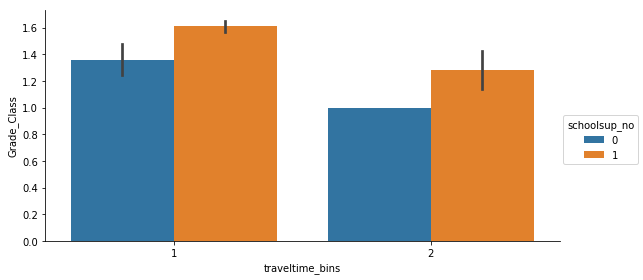

In [43]:
sns.factorplot(x = 'traveltime_bins', y ='Grade_Class',hue ='schoolsup_no', data = insight3_df[insight3_df.school_GP == 1], aspect =2, kind = 'bar')

### Note: We observe that the confidence interval for schoolsup_no = 0 this because there are only 4 students and all of them belong to the same grade class which is class 1.
### We also observe that those who belong to high travel time bin (traveltime_bins =2) also perform better without school support but this is an outlier as there are very few students in traveltime_bins =2 and without school support

### Managerial Action Point: 

### School Gabriel Pereira (GP) should provide good quality educational support especially to those students who spend a lot of time to travel from home to school since they tend to not perform as well as those who spend less time to travel.